In [74]:
pip install fosforml

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
import fosforml
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [76]:
pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [77]:
import seaborn as sns

In [78]:
my_session.connection.database

'ASSORTMENT_PLANNING'

In [79]:
my_session.connection.schema

'CPG_BRONZE'

In [80]:
table_name = "ASSORTMENT_PLANNING.CPG_BRONZE.SALES_CLEAN"

In [81]:
sf_df = my_session.sql("select * from {}".format(table_name))

In [82]:
type(sf_df)

snowflake.snowpark.dataframe.DataFrame

In [83]:
df=sf_df.to_pandas()

In [84]:
df.dtypes

MNTH_CODE             int32
TRANS_DATE           object
START_DATE           object
SALES_VALUE         float64
SALES_UNITS           int16
SALES_VOLUME        float64
SALES_PTR_VALUE     float64
OC_CODE               int32
DISTRIBUTOR_CODE     object
OUTLET_CODE          object
CITY                 object
STATE                object
COUNTY               object
STREET               object
PRODUCT_CODE         object
CATEGORY             object
SUBCATEGORY          object
BRAND                object
dtype: object

In [85]:
df.head()

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,CITY,STATE,COUNTY,STREET,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND
0,202312,2023-12-26,2023-11-27,372.73,2,0.000650,372.727273,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0118,Soap,Medicated Soap,Burgundy
1,202312,2023-12-26,2023-11-27,436.36,3,0.000900,436.363636,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0131,Soap,Toilet Soap,Grape vine
2,202312,2023-12-24,2023-11-27,202.82,2,0.000214,209.090909,202212,DB0209,OL112555,Shelbyville,Tennessee,City Center,Str5,PRD0065,Hair Care,Hair Oil,Crimson
3,202312,2023-12-29,2023-11-27,142.86,16,0.000384,142.857143,202212,DB0655,OL113173,Renton,Washington,Orange,Str2,PRD0106,Hair Care,Shampoo,Hair & Shoulders
4,202312,2023-12-17,2023-11-27,145.45,1,0.000300,145.454545,202212,DB0652,OL112373,Wallingford,Connecticut,Dolphin,Str1,PRD0070,Perfume and Deodrants,Female Deodrant,Pista green


In [86]:
df.shape

(966400, 18)

In [87]:
#How many % of missing values do we have for each feature?
missing_percentage = df.isnull().sum() / df.shape[0] * 100 
missing_percentage

MNTH_CODE           0.0
TRANS_DATE          0.0
START_DATE          0.0
SALES_VALUE         0.0
SALES_UNITS         0.0
SALES_VOLUME        0.0
SALES_PTR_VALUE     0.0
OC_CODE             0.0
DISTRIBUTOR_CODE    0.0
OUTLET_CODE         0.0
CITY                0.0
STATE               0.0
COUNTY              0.0
STREET              0.0
PRODUCT_CODE        0.0
CATEGORY            0.0
SUBCATEGORY         0.0
BRAND               0.0
dtype: float64

In [88]:
#no any transactions happened without distributer and no outliers/NULL in sales
df.loc[df.DISTRIBUTOR_CODE.isnull(), ["SALES_VOLUME", "SALES_UNITS"]].describe()

,SALES_VOLUME,SALES_UNITS
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [89]:
#no any transactions happened without distributer and no outliers in sales
df.loc[df.OUTLET_CODE.isnull(), ["SALES_VOLUME", "SALES_UNITS"]].describe()

,SALES_VOLUME,SALES_UNITS
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [90]:
df.OUTLET_CODE.nunique()

18833

In [91]:
df.DISTRIBUTOR_CODE.nunique()

5

In [92]:
#no negative sales happened
[df.describe()<0]

[       MNTH_CODE  SALES_VALUE  SALES_UNITS  SALES_VOLUME  SALES_PTR_VALUE  \
 count      False        False        False         False            False   
 mean       False        False        False         False            False   
 std        False        False        False         False            False   
 min        False        False        False         False            False   
 25%        False        False        False         False            False   
 50%        False        False        False         False            False   
 75%        False        False        False         False            False   
 max        False        False        False         False            False   
 
        OC_CODE  
 count    False  
 mean     False  
 std      False  
 min      False  
 25%      False  
 50%      False  
 75%      False  
 max      False  ]

In [93]:
df.isnull().sum()

MNTH_CODE           0
TRANS_DATE          0
START_DATE          0
SALES_VALUE         0
SALES_UNITS         0
SALES_VOLUME        0
SALES_PTR_VALUE     0
OC_CODE             0
DISTRIBUTOR_CODE    0
OUTLET_CODE         0
CITY                0
STATE               0
COUNTY              0
STREET              0
PRODUCT_CODE        0
CATEGORY            0
SUBCATEGORY         0
BRAND               0
dtype: int64

In [94]:
df.duplicated().sum()

3158

In [95]:
df.corr(numeric_only=True)

,MNTH_CODE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE
MNTH_CODE,1.000000,-0.007954,-0.011117,-0.005767,-0.007843,-0.791833
SALES_VALUE,-0.007954,1.000000,0.331870,0.925910,0.996460,0.005674
SALES_UNITS,-0.011117,0.331870,1.000000,0.427627,0.334911,0.013232
SALES_VOLUME,-0.005767,0.925910,0.427627,1.000000,0.927547,0.004323
SALES_PTR_VALUE,-0.007843,0.996460,0.334911,0.927547,1.000000,0.006129
OC_CODE,-0.791833,0.005674,0.013232,0.004323,0.006129,1.000000


In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from catboost import CatBoostRegressor, Pool, cv
from catboost import MetricVisualizer

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.stats import boxcox
from os import listdir

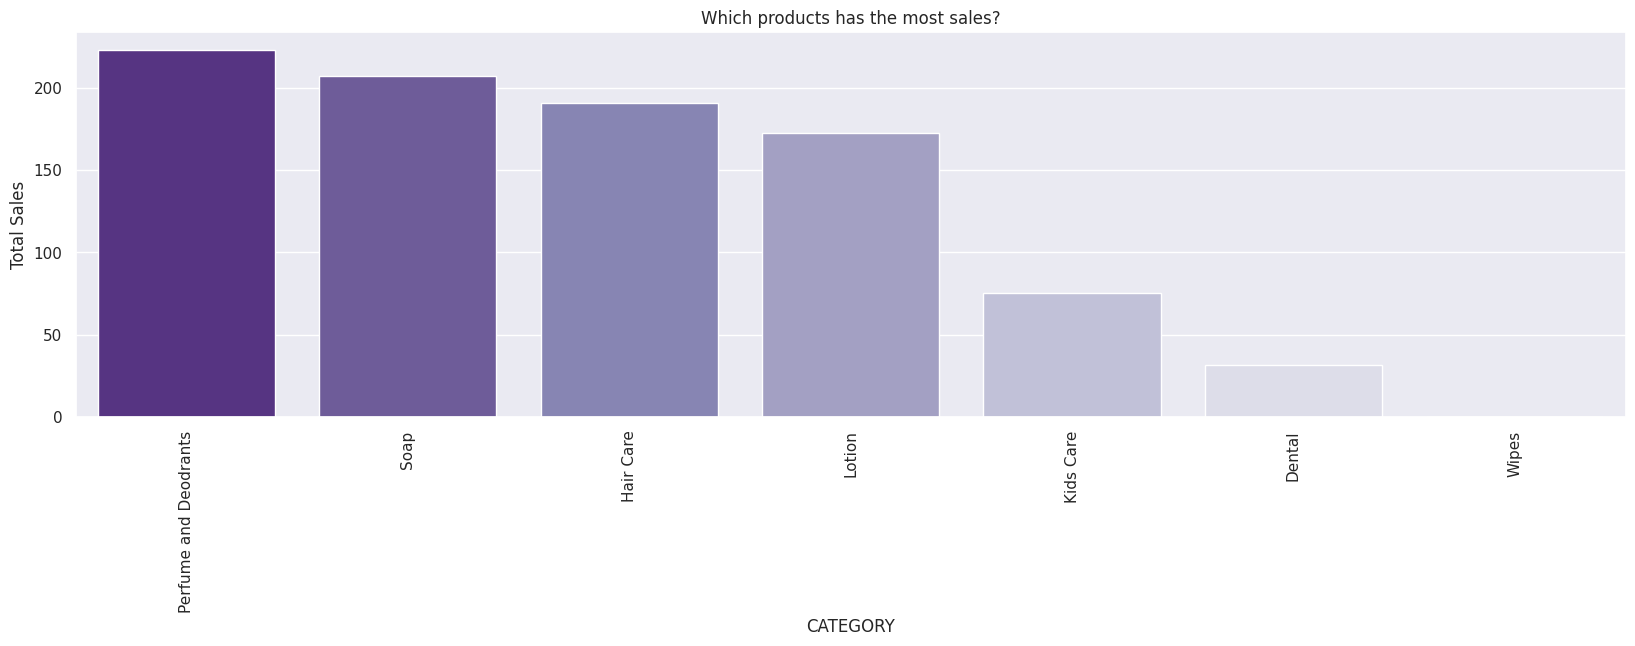

In [97]:

# Group by description and sum the sales
productby_sales = df.groupby('CATEGORY')['SALES_VOLUME'].sum().sort_values(ascending=False).iloc[0:30]

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(x=productby_sales.index, y=productby_sales.values, palette="Purples_r")
plt.ylabel("Total Sales")
plt.title("Which products has the most sales?")
plt.xticks(rotation=90)
plt.show()


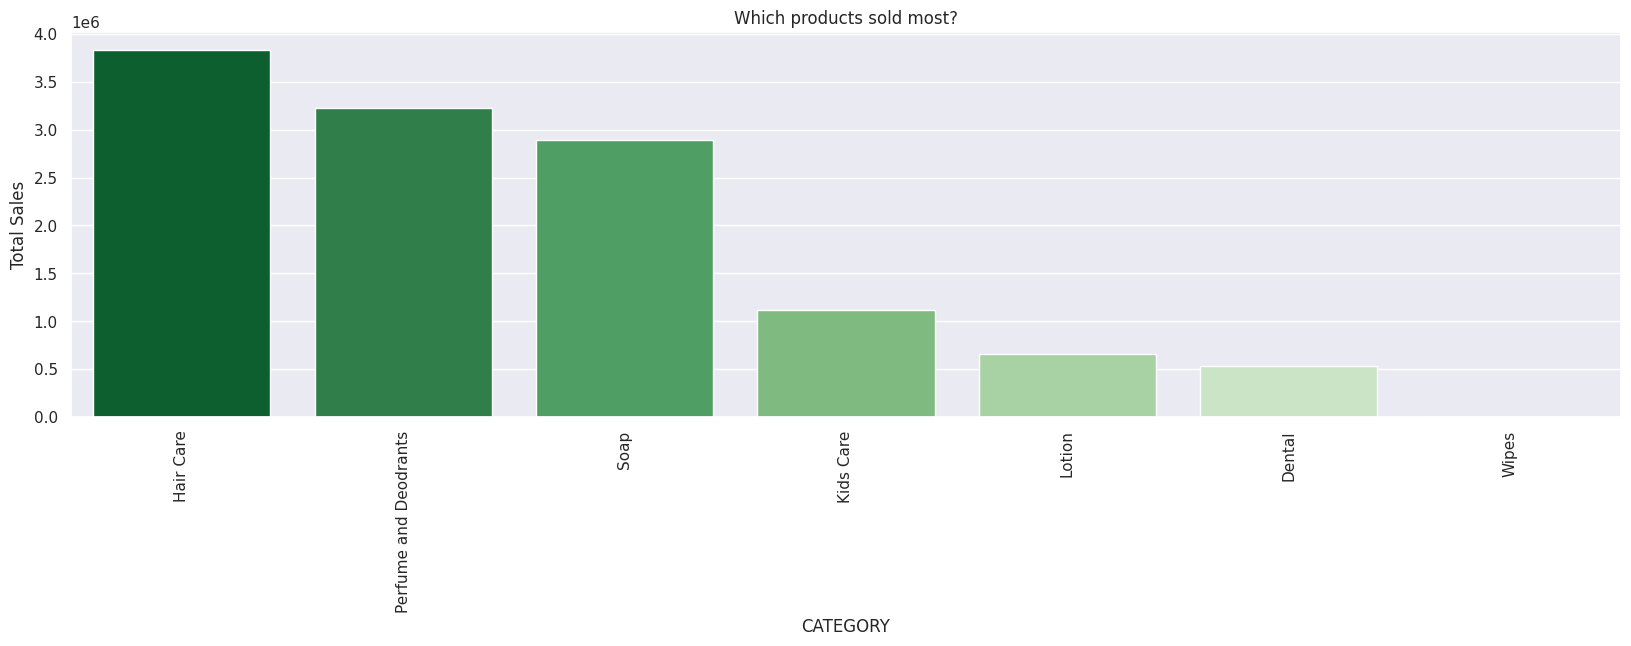

In [98]:

# Group by description and sum the sales
productby_qty = df.groupby('CATEGORY')['SALES_UNITS'].sum().sort_values(ascending=False).iloc[0:30]

# Plotting
plt.figure(figsize=(20, 5))
sns.barplot(x=productby_qty.index, y=productby_qty.values, palette="Greens_r")
plt.ylabel("Total Sales")
plt.title("Which products sold most?")
plt.xticks(rotation=90)
plt.show()


In [99]:
df.COUNTY.nunique()

9

In [100]:
# Find unique dates
df['TRANS_DATE'].nunique()

303

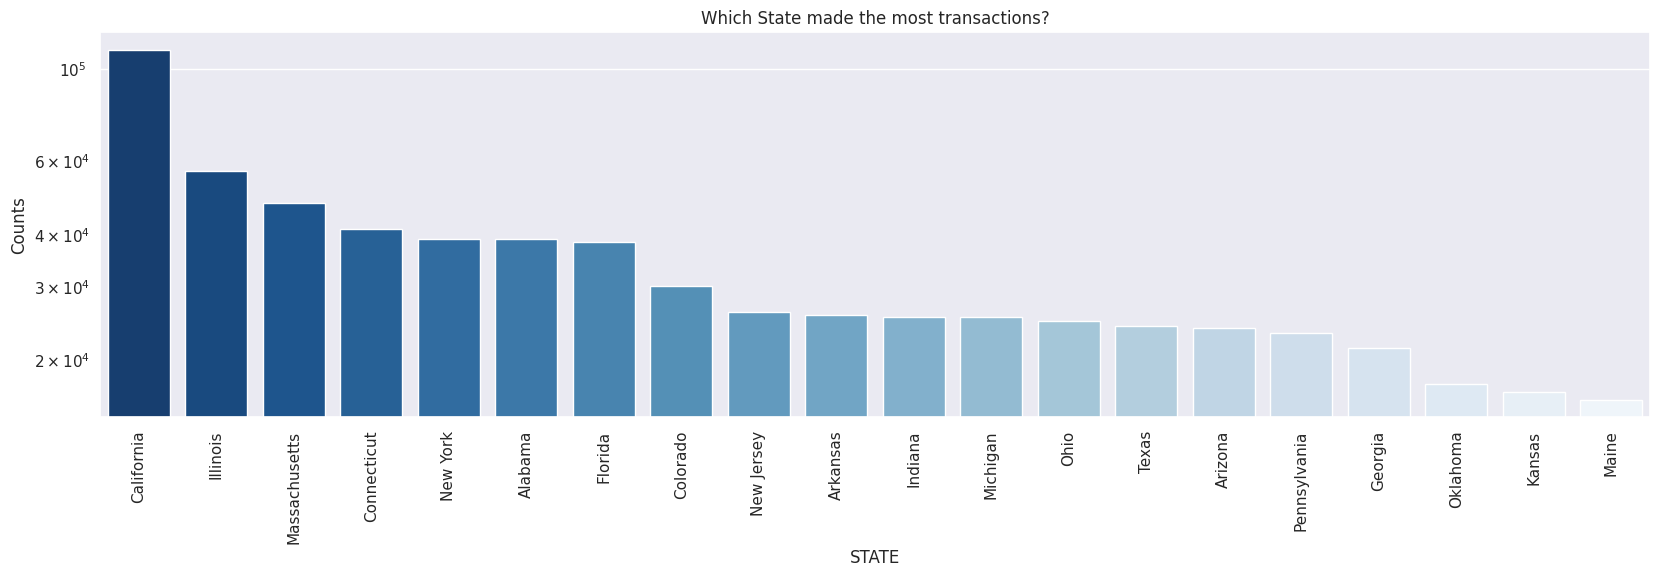

In [101]:
state_counts = df.STATE.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="Blues_r")
plt.ylabel("Counts")
plt.title("Which State made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

In [102]:
#How many percentage of transactions happened in california
df.loc[df.STATE=="California"].shape[0] / df.shape[0] * 100

11.530111754966887

In [103]:
df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

In [104]:
# Create features from date column
df['YEAR'] = df['TRANS_DATE'].dt.year
df['MONTH'] = df['TRANS_DATE'].dt.month
df['DAY'] = df['TRANS_DATE'].dt.day
df['DAY_OF_WEEK'] = df['TRANS_DATE'].dt.day_of_week + 1 # Monday is 1 and sunday is 7
df['QUARTER'] = df['TRANS_DATE'].dt.quarter
df['DAY_OF_YEAR'] = df['TRANS_DATE'].dt.dayofyear

In [105]:
df.describe()

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,YEAR,MONTH,DAY,DAY_OF_WEEK,QUARTER,DAY_OF_YEAR
count,966400.000000,966400,966400,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000
mean,202372.876450,2024-03-01 03:47:10.976821504,2024-02-14 23:17:36.278145536,446.417454,12.696476,0.000931,457.814679,202206.573263,2023.663032,6.557728,15.405579,4.324140,2.513462,184.151133
min,202309.000000,2023-08-29 00:00:00,2023-08-28 00:00:00,2.860000,1.000000,0.000011,1.785714,202201.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,202312.000000,2023-11-30 00:00:00,2023-11-27 00:00:00,140.000000,2.000000,0.000368,142.857143,202204.000000,2023.000000,4.000000,8.000000,3.000000,2.000000,97.000000
50%,202403.000000,2024-03-03 00:00:00,2024-02-27 00:00:00,192.240000,6.000000,0.000448,198.181818,202207.000000,2024.000000,7.000000,15.000000,5.000000,3.000000,186.000000
75%,202406.000000,2024-06-04 00:00:00,2024-05-29 00:00:00,450.000000,16.000000,0.000900,450.000000,202209.000000,2024.000000,9.000000,23.000000,6.000000,3.000000,271.000000
max,202408.000000,2024-08-27 00:00:00,2024-07-31 00:00:00,145728.120000,10240.000000,0.275500,151800.000000,202212.000000,2024.000000,12.000000,31.000000,7.000000,4.000000,365.000000
std,44.525843,NaN,NaN,1053.355633,40.761336,0.002063,1101.769102,3.404526,0.472674,3.399272,8.632029,1.952907,1.100524,103.703252


In [106]:
df_unique = df.drop_duplicates()

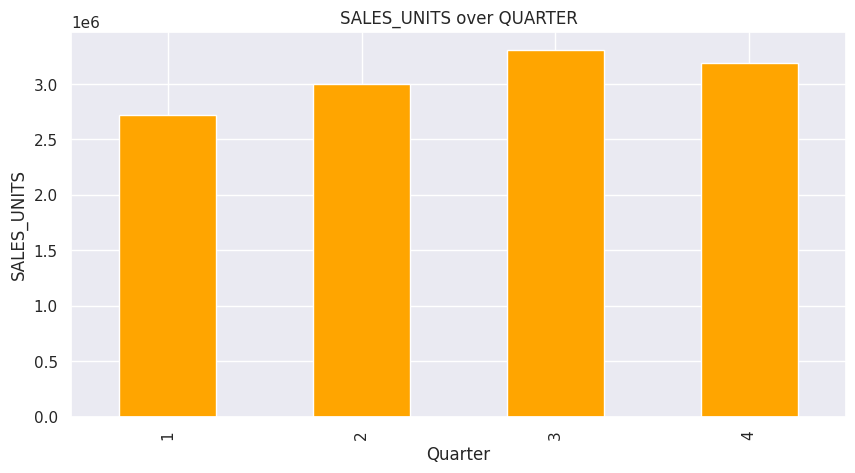

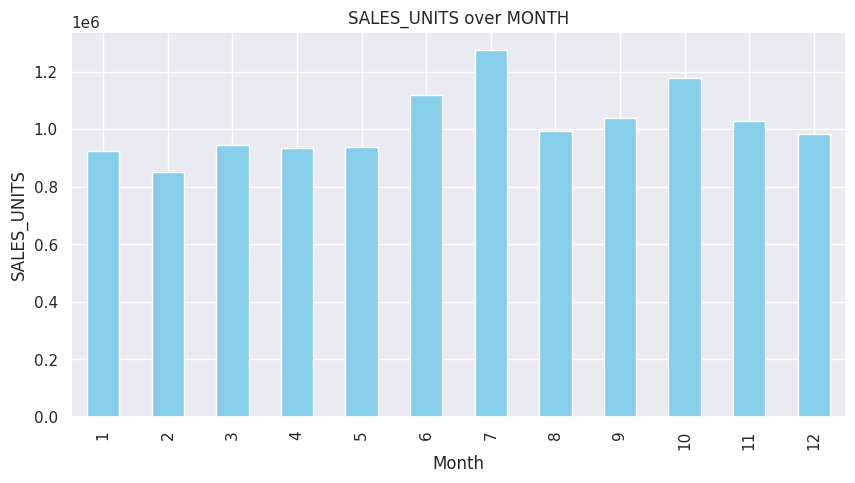

In [107]:
import matplotlib.pyplot as plt

# Plot SALES_UNITS over QUARTER
plt.figure(figsize=(10, 5))
df_unique.groupby('QUARTER')['SALES_UNITS'].sum().plot(kind='bar', color='orange')
plt.title('SALES_UNITS over QUARTER')
plt.xlabel('Quarter')
plt.ylabel('SALES_UNITS')
plt.grid(True)
plt.show()

# Plot SALES_UNITS over MONTH
plt.figure(figsize=(10, 5))
df_unique.groupby('MONTH')['SALES_UNITS'].sum().plot(kind='bar', color='skyblue')
plt.title('SALES_UNITS over MONTH')
plt.xlabel('Month')
plt.ylabel('SALES_UNITS')
plt.grid(True)
plt.show()


In [108]:
#most products are sold in quantities from 1 to 16
df.SALES_UNITS.describe()

count    966400.000000
mean         12.696476
std          40.761336
min           1.000000
25%           2.000000
50%           6.000000
75%          16.000000
max       10240.000000
Name: SALES_UNITS, dtype: float64

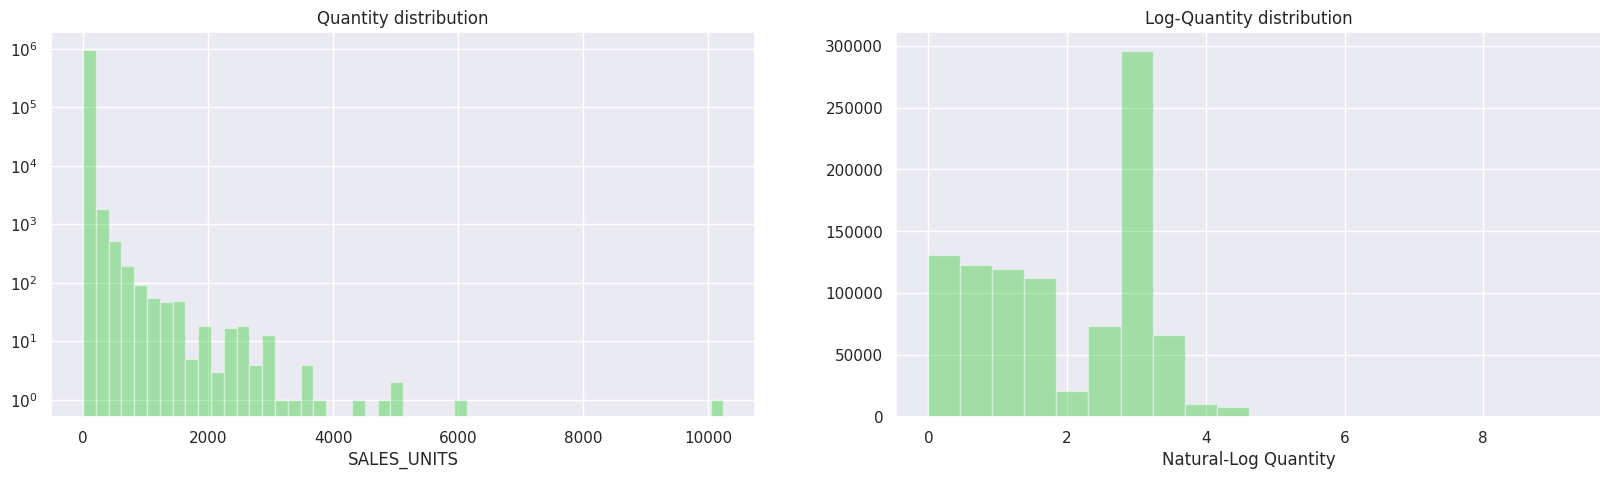

In [109]:
#uniform distribution
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.SALES_UNITS, ax=ax[0], kde=False, color="limegreen");
sns.distplot(np.log(df.SALES_UNITS), ax=ax[1], bins=20, kde=False, color="limegreen");
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")
ax[1].set_xlabel("Natural-Log Quantity");

In [110]:
import datetime
      
startdate = datetime.datetime.strptime('2011-11-01', "%Y-%m-%d").date()
enddate = datetime.datetime.strptime('2011-11-01', "%Y-%m-%d").date()

In [114]:
import pandas as pd

# Define the dates as strings
startdate_str = '2023-01-01'  # Replace with your actual start date
enddate_str = '2023-12-31'    # Replace with your actual end date

# Convert the strings to datetime objects
startdate = pd.to_datetime(startdate_str)
enddate = pd.to_datetime(enddate_str)

# Split the dataset into train and test dataset
df_test = df[df['TRANS_DATE'] < startdate]
df_train = df[df['TRANS_DATE'] >= enddate]


In [115]:
df_train.shape

(643713, 24)

In [116]:
df_test.shape

(0, 24)

In [117]:
df_train.head()

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,...,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND,YEAR,MONTH,DAY,DAY_OF_WEEK,QUARTER,DAY_OF_YEAR
9,202312,2023-12-31,2023-11-27,140.00,16,0.000416,142.857143,202212,DB0209,OL113217,...,PRD0069,Perfume and Deodrants,Female Deodrant,Arctic blue,2023,12,31,7,4,365
36,202312,2023-12-31,2023-11-27,2026.32,6,0.007200,2618.181818,202212,DB0110,OL112053,...,PRD0103,Soap,Soap Gels,Maroon,2023,12,31,7,4,365
56,202312,2023-12-31,2023-11-27,2018.18,12,0.003600,2018.181818,202212,DB0652,OL112924,...,PRD0078,Lotion,Head Lotion,Saffron,2023,12,31,7,4,365
58,202312,2023-12-31,2023-11-27,1851.82,6,0.003000,1909.090909,202212,DB0652,OL112924,...,PRD0126,Hair Care,Shampoo,Clinique Plus,2023,12,31,7,4,365
88,202312,2023-12-31,2023-11-27,89.09,2,0.000400,89.090909,202212,DB0110,OL112237,...,PRD0038,Dental,ToothPaste,Toothy Kids,2023,12,31,7,4,365


In [118]:
X_train = df_train.drop(labels=['MNTH_CODE','TRANS_DATE','START_DATE','SALES_UNITS','SALES_VOLUME','SALES_PTR_VALUE','OC_CODE',
'DISTRIBUTOR_CODE','OUTLET_CODE','PRODUCT_CODE','CATEGORY','SUBCATEGORY','BRAND','YEAR','MONTH','DAY','DAY_OF_WEEK','QUARTER','DAY_OF_YEAR'],axis=1)
y_train = df_train.SALES_UNITS

X_test = df_train.drop(labels=['MNTH_CODE','TRANS_DATE','START_DATE','SALES_UNITS','SALES_VOLUME','SALES_PTR_VALUE','OC_CODE',
'DISTRIBUTOR_CODE','OUTLET_CODE','PRODUCT_CODE','CATEGORY','SUBCATEGORY','BRAND','YEAR','MONTH','DAY','DAY_OF_WEEK','QUARTER','DAY_OF_YEAR'],axis=1)
y_test = df_train.SALES_UNITS



In [119]:
X_train.keys()

Index(['SALES_VALUE', 'CITY', 'STATE', 'COUNTY', 'STREET'], dtype='object')

In [120]:
X_test.keys()

Index(['SALES_VALUE', 'CITY', 'STATE', 'COUNTY', 'STREET'], dtype='object')

In [121]:
score = pd.DataFrame()
score.index.name = 'Scoring'
score['Training+Test Time(sec)'] = None
time_Frame = []

In [122]:
# Check the shapes of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Check the first few rows of X_train and y_train
print("X_train head:\n", X_train.head())
print("y_train head:\n", y_train.head())


X_train shape: (643713, 5)
y_train shape: (643713,)
X_train head:
     SALES_VALUE           CITY       STATE       COUNTY STREET
9        140.00     Sweetwater       Texas  City Center   Str5
36      2026.32      Daly City  California  City Center   Str3
56      2018.18  Santa Barbara  California  City Center   Str1
58      1851.82  Santa Barbara  California  City Center   Str1
88        89.09        Cahokia    Illinois  City Center   Str1
y_train head:
 9     16
36     6
56    12
58     6
88     2
Name: SALES_UNITS, dtype: int16


In [123]:
df['CITY'] = df['CITY'].astype(str)
df['STATE'] = df['STATE'].astype(str)
df['COUNTY'] = df['COUNTY'].astype(str)
df['STATE'] = df['STATE'].str.strip(str)
df['SALES_VALUE'] = df['SALES_VALUE'].astype(int)

In [134]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
#data splitting

X_train shape: (5, 5)
y_train shape: (643713,)
X_test shape: (643713, 5)
y_test shape: (643713,)


In [126]:
#verify data loading
print("First few rows of X_train:\n", X_train[:5])
print("First few rows of y_train:\n", y_train[:5])

First few rows of X_train:
     SALES_VALUE           CITY       STATE       COUNTY STREET
9        140.00     Sweetwater       Texas  City Center   Str5
36      2026.32      Daly City  California  City Center   Str3
56      2018.18  Santa Barbara  California  City Center   Str1
58      1851.82  Santa Barbara  California  City Center   Str1
88        89.09        Cahokia    Illinois  City Center   Str1
First few rows of y_train:
 9     16
36     6
56    12
58     6
88     2
Name: SALES_UNITS, dtype: int16


In [137]:
#Linear Regression model
reg = LinearRegression()
lr = reg.fit(X_train, y_train)
%time reg.fit(X_train, y_train)
pred_train_lr= lr.predict(X_train)

print("Train RMSE:",np.sqrt(mean_squared_error(y_train,pred_train_lr)))

%time reg.fit(X_test, y_test)
pred_test_lr= lr.predict(X_test)
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_lr))) 

ValueError: could not convert string to float: 'Sweetwater'